#Sentiment140 dataset with 1.6 million tweets

## Importing NLP Functionalities

In [ ]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag, word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#nlp
import spacy
nlp = spacy.load('en')

# # sklearn
# from sklearn.svm import LinearSVC
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.linear_model import LogisticRegression

# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Importing the Dataset

In [ ]:
!pip install -q kaggle

with open('kaggle.json', 'w') as f:
  f.write('{"username":"yashgroot","key":"56590d8c3eb21dc01ac54fc1c3f39663"}')

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d kazanova/sentiment140
!unzip sentiment140.zip -d ./

100% 80.9M/80.9M [00:00<00:00, 111MB/s]

Archive:  sentiment140.zip
  inflating: ./training.1600000.processed.noemoticon.csv  


In [ ]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset=pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = DATASET_ENCODING,  names = DATASET_COLUMNS)
dataset


sentiment  ...                                               text
0                0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1                0  ...  is upset that he can't update his Facebook by ...
2                0  ...  @Kenichan I dived many times for the ball. Man...
3                0  ...    my whole body feels itchy and like its on fire 
4                0  ...  @nationwideclass no, it's not behaving at all....
...            ...  ...                                                ...
1599995          4  ...  Just woke up. Having no school is the best fee...
1599996          4  ...  TheWDB.com - Very cool to hear old Walt interv...
1599997          4  ...  Are you ready for your MoJo Makeover? Ask me f...
1599998          4  ...  Happy 38th Birthday to my boo of alll time!!! ...
1599999          4  ...  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 6 columns]

##Distribution of Positive and Negative Sentiments

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


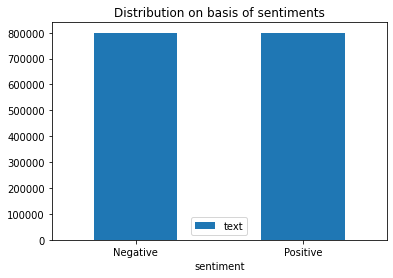

In [ ]:
dataset = dataset[['sentiment','text']]
# dataset
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution on basis of sentiments', legend=True)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

##Sampling the Dataset

In [ ]:
dataset_negative = dataset.head(800000)
dataset_positive = dataset.tail(800000)
dataset_positive_sampled = dataset_positive.sample(n=20000)
dataset_negative_sampled = dataset_negative.sample(n=20000)
dataset_sampled = [dataset_negative_sampled,dataset_positive_sampled]
dataset_sampled = pd.concat(dataset_sampled)
tweets, sentiment = list(dataset_sampled['text']), list(dataset_sampled['sentiment'])

##Distribution of Word Count of positive tweets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


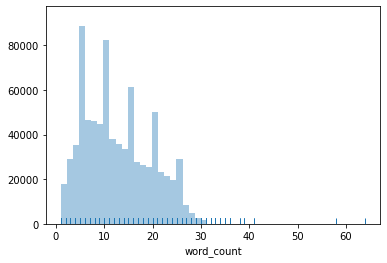

In [ ]:
dataset_positive["word_count"] = dataset_positive['text'].apply(lambda x: len(str(x).split()))
sns.distplot(dataset_positive.word_count, kde=False, rug=True)

##Distribution of Word Count of negative tweets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


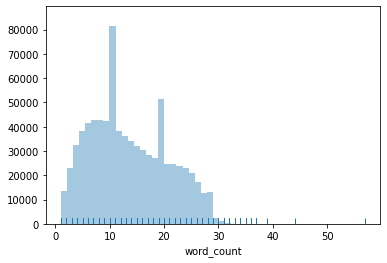

In [ ]:
dataset_negative["word_count"] = dataset_negative['text'].apply(lambda x: len(str(x).split()))
sns.distplot(dataset_negative.word_count, kde=False, rug=True)

In [ ]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern       = '@[^\s]+'
alphaPattern      = "[^a-zA-Z0-9]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

##Functionality to Preprocess the Data

In [ ]:
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token in ['hahah', 'hahaha', 'hahahaha']:
        return 'haha'
    if token in ['lmao', 'lolz', 'rofl']:
        return 'lol'
    if token == 'goood':
        return 'good'
    if token == 'thanx' or token == 'thnx':
        return 'thanks'
    if token in ["i'm", "don't", "can't", "couldn't", "aren't", "wouldn't", "isn't", "didn't", "hadn't","doesn't", "won't", "haven't", "wasn't", "hasn't", "shouldn't", "ain't", "they've"]:
        return token.replace("'", "")
    if token == 'bday' or token == 'b-day':
        return 'birthday'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25' or token == 'URL':
        return ''
    return token

In [ ]:
def  pre_process(text, sentiment):
  pre_processed_text = []
  cleaned_token_list =[]
  lemmatizer = WordNetLemmatizer()
  stop_words = stopwords.words("english")
  stemmer = SnowballStemmer("english")
  
  for i in range(len(text)):
    # converting in lower case
    tweet = text[i]
    label = sentiment[i]
    tweet = tweet.lower()
    tokens=[]

    # replacing the patterns, and emojis with words
    tweet = re.sub(urlPattern, "URL", tweet)
    for emoji in emojis.keys():
      tweet = tweet.replace(emoji, emojis[emoji])
    tweet = re.sub(userPattern,'', tweet) 
    tweet = re.sub(alphaPattern, " ", tweet)
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    words =''
    # for word in tweet.split():
    for word, tag in pos_tag(word_tokenize(tweet)):
          # print(word)
          # Checking if the word is a stopword.
          #if word not in stopwordlist:
          # Lemmatizing the word.
      if len(word)>1:
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['n', 'v'] else 'a'
        word = lemmatizer.lemmatize(word, wntag) if wntag else word
        # word = stemmer.stem(word)
        word = cleaned(word)
        if word == "":
          continue
        if (word not in stop_words):
          words += (word+' ')
          tokens.append(word)
    # print(words)      
    pre_processed_text.append(words)
    cleaned_token_list.append((tokens, label))
  return pre_processed_text, cleaned_token_list
  


###A preprocessing example

In [ ]:
text = ["@switchfoot http://twitpic.com/2y1zl - Awww, Hey I'm  b'day :) better good selected horses adjustable meeting "]
# text = ["Never use @Zomato food service, they deliver worst quality food and there help desk executive had no politness.. . :(   https://t.co/0vM6OJadjP"]
print(pre_process(text,[1] ))

(['aww hey day smile good good select horse adjustable meeting '], [(['aww', 'hey', 'day', 'smile', 'good', 'good', 'select', 'horse', 'adjustable', 'meeting'], 1)])


##Preprocessing the Tweets

In [ ]:
import time
t = time.time()
pre_processed_text, cleaned_token_list = pre_process(tweets,sentiment)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 41 seconds


##WordCloud Visualization of the Negative Sentiments 

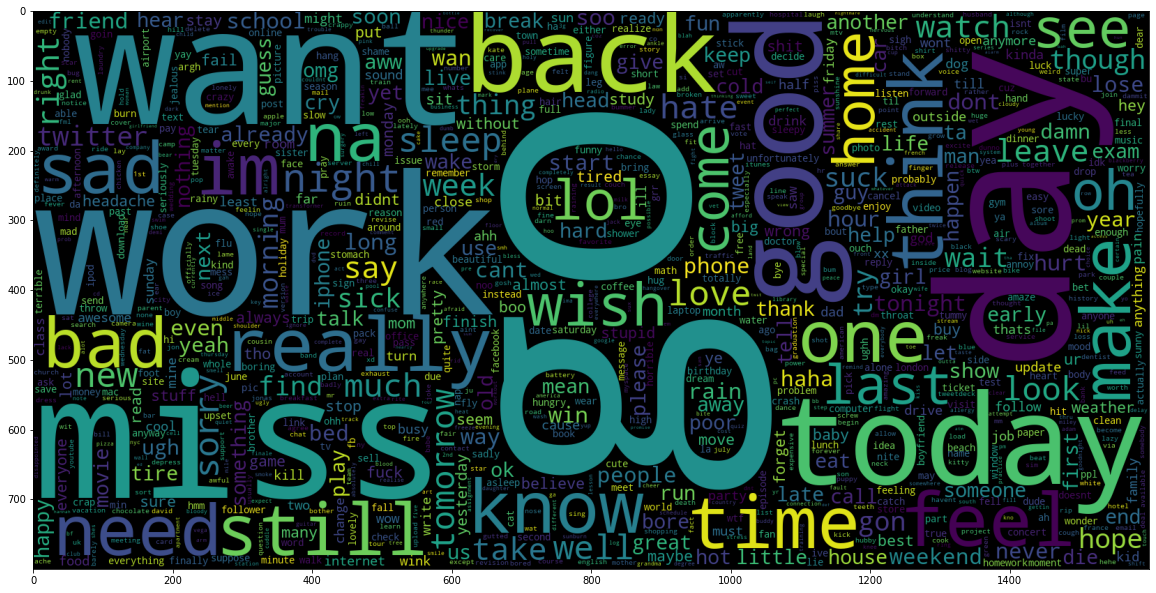

In [ ]:
data_neg = pre_processed_text[:20000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

##Wordcloud Visualization for the Positive Sentiments

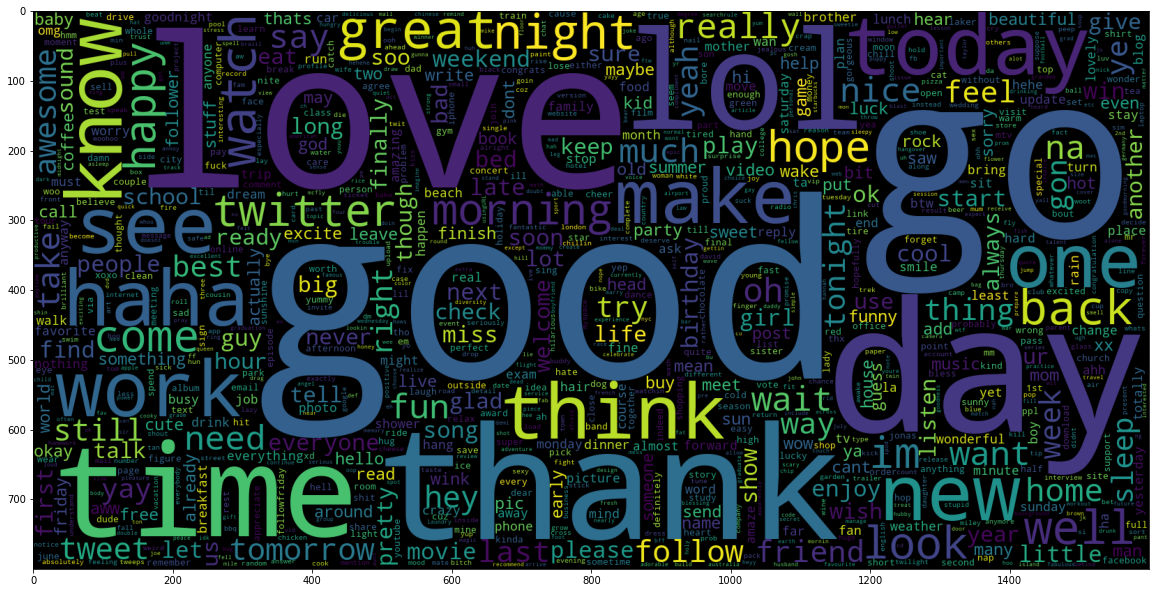

In [ ]:
data_pos = pre_processed_text[20000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
!pip install scattertext
import scattertext as st
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

     |████████████████████████████████| 7.3MB 3.8MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9299 sha256=3d1a880e80743e085070b27598a73a9191cae881e71207e41afb799fa4668a9d
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext


##Dataset with the Preprocessed and Cleaned Text

In [ ]:
dataset_sampled['pre_processed_text'] = pre_processed_text
dataset_sampled['cleaned'] = dataset_sampled.pre_processed_text.apply(nlp)
dataset_sampled = dataset_sampled.replace({'sentiment': 0}, 'negative')
dataset_sampled = dataset_sampled.replace({'sentiment': 1}, 'positive')
dataset_sampled
# dataset_sampled.info(memory_usage="deep")


sentiment  ...                                            cleaned
697925   negative  ...  (truly, shocked, strong, individual, even, str...
500507   negative  ...                              (thanks, bad, happen)
332119   negative  ...  (wait, sims, bloody, living, australia, next, ...
762805   negative  ...  (today, birthday, marlo, feliz, cumpleanos, mi...
205580   negative  ...  (stick, frickin, clydebank, due, line, fault, ...
...           ...  ...                                                ...
1472442  positive  ...                               (class, is, nt, bad)
1254960  positive  ...                    (lol, tai, chi, say, mui, thai)
1246845  positive  ...                                        (hope, fun)
1077171  positive  ...               (sweet, sound, like, soo, much, fun)
1020056  positive  ...                                  (happy, birthday)

[40000 rows x 4 columns]

##Building the Corpus

In [ ]:
corpus = st.CorpusFromParsedDocuments(dataset_sampled, category_col='sentiment', parsed_col='cleaned').build()

##ScatterPlot of the data based on the Postive and Negative Sentiments

In [ ]:
html = st.produce_scattertext_explorer(corpus,
                                       category='positive',
                                       category_name='positive',
                                       not_category_name='negative',
                                       minimum_term_frequency=5,
                                       width_in_pixels=1000,
                                       transform=st.Scalers.percentile,
                                       metadata=dataset_sampled['text'])
file_name = 'ScattertextLog.html'
with open(file_name, 'wb') as fp: 
    fp.write(html.encode('utf-8'))


In [ ]:
import IPython
IPython.display.HTML(filename='/content/ScattertextLog.html') 

# Multinomial Naive Bayes


## Spliting Data

In [ ]:
t1  = time.time()

from sklearn.model_selection import train_test_split
dataset_sampled = dataset_sampled.replace({'sentiment': 'negative'}, 0)
dataset_sampled = dataset_sampled.replace({'sentiment': 'positive'}, 1)
X_train, X_test, y_train, y_test = train_test_split(dataset_sampled['pre_processed_text'],dataset_sampled['sentiment'] , test_size=0.30, random_state=42)
print(X_train, X_test, y_train, y_test)
# dataset_sampled

1590778                          shall finally go work xoxo 
731152      manage cut tounge last night man really hurttss 
1281935                                        ouch feeling 
77695             bummer excite kubel grand slam still twin 
376385                    390 kb 55 mb hour min remain sigh 
                                 ...                        
434210     internet connection officially stuff go intere...
766148     bestweets everyone go glasto except indi go ca...
1403522    aww thanks thinking allergy one year old twin ...
728833     get heart break guy like kinda love friend min...
326299                                                stand 
Name: pre_processed_text, Length: 28000, dtype: object 1001841            hope good night go bed late nighty night 
231505     wayy addict gloria jean hot chocolate hate glo...
1012776                              followfriday ruin life 
594342     presentation tomorrow head back grap miss love...
1412472        might go dance 

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,3)) 
vectorizer.fit(X_train)          
x_tr=vectorizer.transform(X_train)
x_te=vectorizer.transform(X_test)

In [ ]:
x_tr.shape

(28000, 2912)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from itertools import chain
from sklearn.linear_model import LogisticRegression

## Building Evaluation Function

In [ ]:
def model_Evaluate(model, X_test_data, Y_test_data):
    
    # Predict values for Test dataset
    y_pred_cont = model.predict(X_test_data)
    y_pred_bin = []
    for i in y_pred_cont:
      if 1- i <= i - 0:
        y_pred_bin.append(1)
      else : 
        y_pred_bin.append(0)
    # Print the evaluation metrics for the dataset.
    print(classification_report(Y_test_data, y_pred_bin))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(Y_test_data, y_pred_bin)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## HyperParameter tuning

In [ ]:
model = MultinomialNB()  
parameters = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5,
10, 50, 100]}
clf = GridSearchCV(model, parameters, cv=10,scoring='roc_auc',return_train_score=True)
clf.fit(x_tr, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)    # converting the results in to a dataframe
results = results.sort_values(['param_alpha'])  
results.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.008747      0.000730  ...          0.861340         0.000591
1       0.008492      0.000246  ...          0.861340         0.000591
2       0.008461      0.000420  ...          0.861340         0.000591
3       0.008577      0.000674  ...          0.861338         0.000591
4       0.008480      0.000524  ...          0.861336         0.000590

[5 rows x 31 columns]

In [ ]:
train_auc= results['mean_train_score'].values  #extracting the auc scores 
cv_auc = results['mean_test_score'].values

In [ ]:
a1=[]
for i in parameters.values():
    a1.append(i)
alphas = list(chain.from_iterable(a1))

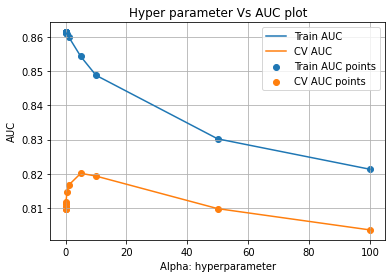

In [ ]:
plt.plot(alphas, train_auc, label='Train AUC')
plt.plot(alphas, cv_auc, label='CV AUC')
plt.scatter(alphas, train_auc, label='Train AUC points')
plt.scatter(alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")  
plt.grid()
plt.show()

In [ ]:
bestparam=clf.best_params_['alpha']   #extracting the best hyperparameter
print("The best Alpha=",bestparam)

The best Alpha= 5


##Building a Naive Bayes model with the best alpha

In [ ]:
mul_model = MultinomialNB(alpha=bestparam) #Building a Naive Bayes model with the best alpha
mul_model.fit(x_tr,y_train)

MultinomialNB(alpha=5, class_prior=None, fit_prior=True)

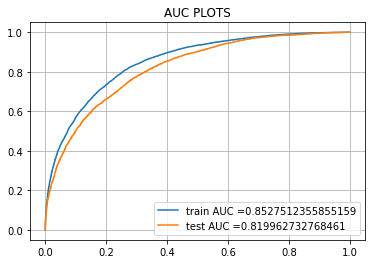

In [ ]:
y_train_pred = mul_model.predict_proba(x_tr)[:,1]  #Prediction using the model(log probability of each class)
y_test_pred = mul_model.predict_proba(x_te)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)   
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.title("AUC PLOTS")             #Plotting train and test AUC 
plt.grid()
plt.show()

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      5997
           1       0.74      0.72      0.73      6003

    accuracy                           0.73     12000
   macro avg       0.74      0.73      0.73     12000
weighted avg       0.74      0.73      0.73     12000



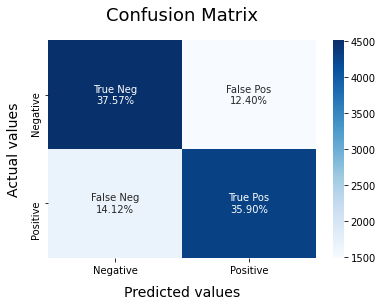

In [ ]:
model_Evaluate(mul_model, x_te, y_test)

In [ ]:
trauc=round(auc(train_fpr, train_tpr),3)
teauc=round(auc(test_fpr, test_tpr),3)
print('Train AUC=',trauc)
print('Test AUC=',teauc)

Train AUC= 0.853
Test AUC= 0.82


## Finding the best threshold 

In [ ]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]      #finding the best threashold 
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:                                 #building a confusion matrix with the best threashold 
            predictions.append(0)
    return predictions

In [ ]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
TRCM=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
TECM=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

def CM(x,y):
    labels = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in x.flatten()]
                    
    labels = [f"{v1}\n{v2}" for v1, v2 in
    zip(labels,group_counts)]
    labels = np.asarray(labels).reshape(2,2)       #Building a design for the confusion matrix
    sns.heatmap(x, annot=labels, fmt='', cmap='BuPu')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(y)
    plt.plot()


the maximum value of tpr*(1-fpr) 0.596909925368313 for threshold 0.487


## Confusion Matrix

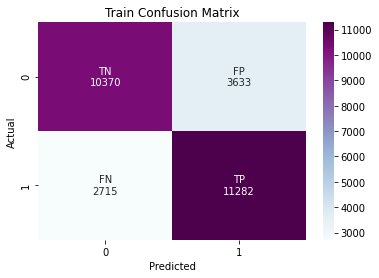

In [ ]:
CM(TRCM,'Train Confusion Matrix')

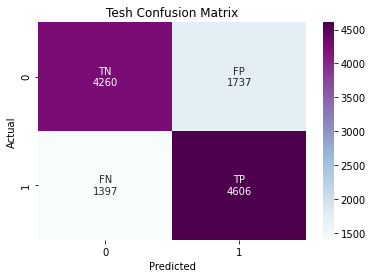

In [ ]:
CM(TECM,'Tesh Confusion Matrix')

## Accuracy and Time Taken by Training

In [ ]:
print("Train accuracy = ",(TRCM[0,0]+TRCM[1,1])/np.sum(TRCM)*100)   
print("Test accuracy = ",(TECM[0,0]+TECM[1,1])/np.sum(TECM)*100)
print(f'Time Taken by Naive Bayes Model After Preprocessing: {round(time.time()-t1)} seconds')

Train accuracy =  77.32857142857142
Test accuracy =  73.88333333333334
Time Taken by Naive Bayes Model After Preprocessing: 183 seconds


## Logistic Regression


              precision    recall  f1-score   support

           0       0.75      0.74      0.74      5997
           1       0.74      0.76      0.75      6003

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



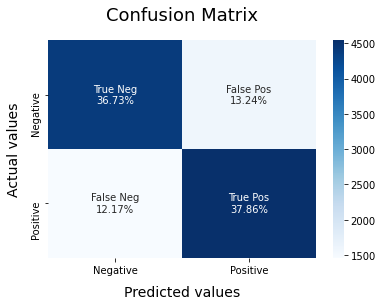

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_tr, y_train)
model_Evaluate(LRmodel, x_te, y_test)

## LSTM

Preprocessing

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-12-20 06:10:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-20 06:10:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-20 06:10:08--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [ ]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [ ]:
word_to_index['hello']

176468

In [ ]:
word_to_vec_map['hello']

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ])

In [ ]:
def cosine_similarity(u, v):
    dot = np.dot(u, v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    cosine_similarity = dot / (norm_u * norm_v)
    return cosine_similarity


In [ ]:
cosine_similarity(word_to_vec_map['cucumber'], word_to_vec_map['tomato'])

0.8632714714841137

In [ ]:
cosine_similarity(word_to_vec_map['cucumber'], word_to_vec_map['phone'])


-0.012485506721235957

In [ ]:
start_time = time.time()

unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

        
# Here we will utilize the already computed 'cleaned_tokens_list' variable
   
print('Removed Noise, CPU Time:', time.time() - start_time)
start_time = time.time()

list_len = [len(i) for i, j in cleaned_token_list]
max_len = max(list_len)
print('max_len:', max_len)

X = np.zeros((len(cleaned_token_list), max_len))
Y = np.zeros((len(cleaned_token_list), ))

for i, tk_lb in enumerate(cleaned_token_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time.time() - start_time)


print(X[:5])
print(Y[:5])

Removed Noise, CPU Time: 0.0001952648162841797
max_len: 24
Data Prepared for model, CPU Time: 0.1767280101776123
[[366129. 329443. 344851. 189262. 141816. 344851. 354461. 323421.  44493.
  327482. 340121. 385218.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]
 [357161.  65963. 173061.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]
 [382320. 332159.  78517. 224021.  63420. 260309. 157049. 305005. 359889.
  350979. 357161.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]
 [361080.  76936. 234996. 146599. 372306. 246253. 226278. 136741. 384780.
  117492. 365892. 270434.  73364.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]
 [343129. 153964. 103348. 130319. 222946. 145731. 363590. 313329. 143869.
   56041. 372306.

Model

In [ ]:
import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split

In [ ]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len):
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["unk"].shape[0] #50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False, input_shape=(max_len,))
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [ ]:
LSTM_model = Sequential()

LSTM_model.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
LSTM_model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
LSTM_model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
LSTM_model.add(Dense(units=1, activation='sigmoid'))

LSTM_model.summary()

In [ ]:
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [ ]:
len(X_train_data)

In [ ]:
len(X_test_data)

In [ ]:
LSTM_model.fit(X_train_data, Y_train_data, validation_data=(X_test_data, Y_test_data), epochs = 20, batch_size = 128, shuffle=True)

In [ ]:
def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [ ]:
plot_acc_loss(LSTM_model.history)

In [ ]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1

n_unk_words

8552

In [ ]:
from collections import Counter
Counter(unks).most_common(50)

[('folowfriday', 79),
 ('idk', 67),
 ('coky', 37),
 ('awh', 34),
 ('tweps', 33),
 ('sux', 24),
 ('ahaha', 24),
 ('usingURL', 24),
 ('30am', 23),
 ('hehehe', 23),
 ('wrk', 21),
 ('2morow', 21),
 ('squarespace', 21),
 ('tomorow', 21),
 ('bleh', 21),
 ('yey', 20),
 ('urgh', 18),
 ('tmrw', 18),
 ('awsome', 18),
 ('lvat', 17),
 ('2moro', 17),
 ('retwet', 16),
 ('probs', 16),
 ('iranelection', 15),
 ('damnit', 14),
 ('hayfever', 14),
 ('nkotb', 14),
 ('sucky', 14),
 ('marsiscoming', 14),
 ('hahaha', 13),
 ('tbh', 12),
 ('sowy', 12),
 ('30pm', 12),
 ('efin', 12),
 ('bestie', 12),
 ('proly', 12),
 ('hahahahaha', 12),
 ('twiterer', 12),
 ('atURL', 12),
 ('delongeday', 12),
 ('omfg', 11),
 ('tweple', 11),
 ('twiterverse', 11),
 ('twiterland', 11),
 ('xox', 11),
 ('isplayer', 10),
 ('twiterfon', 10),
 ('lmao', 10),
 ('twiterific', 10),
 ('unfolow', 10)]

In [ ]:
keras.backend.clear_session()

model_clean_data = Sequential()

model_clean_data.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_clean_data.add(Dense(units=1, activation='sigmoid'))

model_clean_data.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 24, 50)            20000050  
_________________________________________________________________
bidirectional (Bidirectional (None, 24, 256)           183296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
_________________________________________________________________


In [ ]:
model_clean_data.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [ ]:
model_clean_data.fit(X_train_data, Y_train_data, validation_data=(X_test_data, Y_test_data), epochs = 10, batch_size = 128, shuffle=True)

Epoch 1/10
250/250 [==============================] - 88s 351ms/step - loss: 0.5100 - accuracy: 0.7437 - val_loss: 0.5444 - val_accuracy: 0.7203
Epoch 2/10
250/250 [==============================] - 87s 350ms/step - loss: 0.4943 - accuracy: 0.7563 - val_loss: 0.5459 - val_accuracy: 0.7216
Epoch 3/10
250/250 [==============================] - 87s 349ms/step - loss: 0.4742 - accuracy: 0.7680 - val_loss: 0.5562 - val_accuracy: 0.7224
Epoch 4/10
250/250 [==============================] - 87s 350ms/step - loss: 0.4529 - accuracy: 0.7831 - val_loss: 0.5676 - val_accuracy: 0.7194
Epoch 5/10
250/250 [==============================] - 88s 351ms/step - loss: 0.4232 - accuracy: 0.7991 - val_loss: 0.5778 - val_accuracy: 0.7241
Epoch 6/10
250/250 [==============================] - 87s 350ms/step - loss: 0.3868 - accuracy: 0.8214 - val_loss: 0.6194 - val_accuracy: 0.7054
Epoch 7/10
250/250 [==============================] - 88s 351ms/step - loss: 0.3455 - accuracy: 0.8454 - val_loss: 0.6898 - val_ac

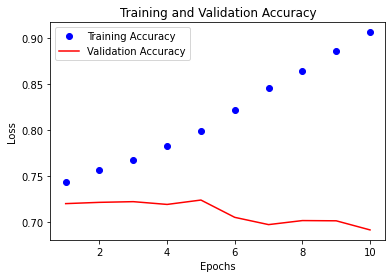

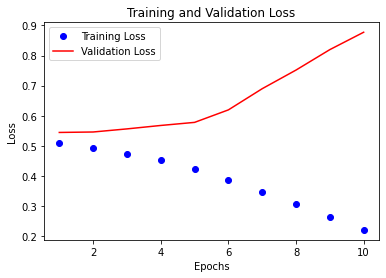

In [ ]:
plot_acc_loss(model_clean_data.history)

              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69      4000
         1.0       0.69      0.70      0.70      4000

    accuracy                           0.69      8000
   macro avg       0.69      0.69      0.69      8000
weighted avg       0.69      0.69      0.69      8000



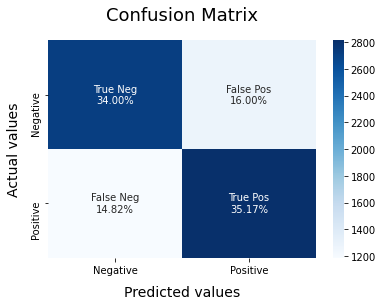

In [ ]:
model_Evaluate(model_clean_data, X_test_data, Y_test_data)

## Further Steps

In [ ]:
dataset_time=pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = DATASET_ENCODING,  names = DATASET_COLUMNS)
df_date = dataset_time.copy()[['sentiment', 'date']]
df_date['sentiment'] = df_date['sentiment'].replace(0,"Negative")
df_date['sentiment'] = df_date['sentiment'].replace(4,"Positve")
df_date.head()

sentiment                          date
0  Negative  Mon Apr 06 22:19:45 PDT 2009
1  Negative  Mon Apr 06 22:19:49 PDT 2009
2  Negative  Mon Apr 06 22:19:53 PDT 2009
3  Negative  Mon Apr 06 22:19:57 PDT 2009
4  Negative  Mon Apr 06 22:19:57 PDT 2009

In [ ]:
df_date['hour'] = df_date.date.apply(lambda x: x[11:13]).astype('int32')
df_date.head()

sentiment                          date  hour
0  Negative  Mon Apr 06 22:19:45 PDT 2009    22
1  Negative  Mon Apr 06 22:19:49 PDT 2009    22
2  Negative  Mon Apr 06 22:19:53 PDT 2009    22
3  Negative  Mon Apr 06 22:19:57 PDT 2009    22
4  Negative  Mon Apr 06 22:19:57 PDT 2009    22

In [ ]:
df_date['dow'] = df_date.date.apply(lambda x: x[:3]).astype('str')
df_date.head()


sentiment                          date  hour  dow
0  Negative  Mon Apr 06 22:19:45 PDT 2009    22  Mon
1  Negative  Mon Apr 06 22:19:49 PDT 2009    22  Mon
2  Negative  Mon Apr 06 22:19:53 PDT 2009    22  Mon
3  Negative  Mon Apr 06 22:19:57 PDT 2009    22  Mon
4  Negative  Mon Apr 06 22:19:57 PDT 2009    22  Mon

In [ ]:
temporal_hour = pd.pivot_table(df_date, index='sentiment', columns='hour', aggfunc='size', fill_value=0)
temporal_hour

hour          0      1      2      3      4   ...     19     20     21     22     23
sentiment                                     ...                                   
Negative   35582  30581  30171  31717  34946  ...  31193  30102  36007  39018  39506
Positve    45283  44687  43820  42536  42049  ...  26529  26957  32957  39310  45244

[2 rows x 24 columns]

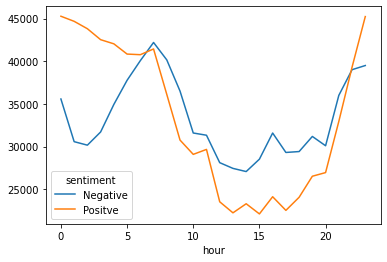

In [ ]:
temporal_hour.transpose().plot()

In [ ]:
temporal_hour = temporal_hour.iloc[:, :].apply(lambda x: x / x.sum())
temporal_hour

hour             0         1         2   ...        21        22        23
sentiment                                ...                              
Negative   0.440017  0.406295  0.407766  ...  0.522113  0.498136  0.466147
Positve    0.559983  0.593705  0.592234  ...  0.477887  0.501864  0.533853

[2 rows x 24 columns]

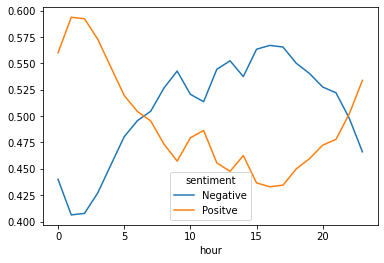

In [ ]:
temporal_hour.transpose().plot()

In [ ]:
temporal_dow = pd.pivot_table(df_date, index='sentiment', columns='dow', aggfunc='size', fill_value=0)
temporal_dow

dow           Fri     Mon     Sat     Sun    Thu     Tue    Wed
sentiment                                                      
Negative   114600  132539  157734  145471  80132  101051  68473
Positve    110994  177666  173221  199084  25903   84799  28333

In [ ]:
temporal_dow = temporal_dow[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
temporal_dow

dow           Mon     Tue    Wed    Thu     Fri     Sat     Sun
sentiment                                                      
Negative   132539  101051  68473  80132  114600  157734  145471
Positve    177666   84799  28333  25903  110994  173221  199084

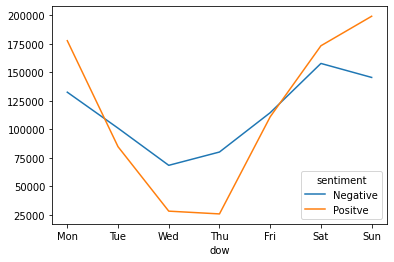

In [ ]:
temporal_dow.transpose().plot()

In [ ]:
temporal_dow = temporal_dow.iloc[:, :].apply(lambda x: x / x.sum())
temporal_dow

dow             Mon       Tue       Wed       Thu       Fri       Sat     Sun
sentiment                                                                    
Negative   0.427263  0.543723  0.707322  0.755713  0.507992  0.476603  0.4222
Positve    0.572737  0.456277  0.292678  0.244287  0.492008  0.523397  0.5778

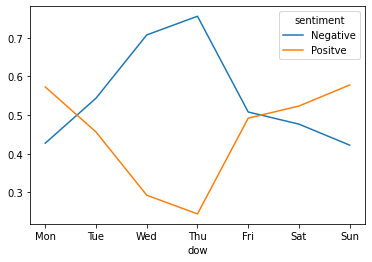

In [ ]:
temporal_dow.transpose().plot()

In [ ]:
# keras.backend.clear_session()

model_dropout = Sequential()

model_dropout.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_dropout.add(Dense(units=1, activation='sigmoid'))

model_dropout.summary()

In [ ]:
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_dropout.fit(X_train_data, Y_train_data, validation_data=(X_test_data, Y_test_data), epochs = 20, batch_size = 128, shuffle=True)

In [ ]:
plot_acc_loss(model_dropout.history)


In [ ]:
# model_dropout.predict(X_test_data)
model_Evaluate(model_dropout, X_test_data, Y_test_data)

In [ ]:
def sentence_to_indices(sentence_words, max_len):
    X = np.zeros((max_len))
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
        X[j] = index
    return X

def predict_custom_tweet_sentiment(custom_tweet):
    # Convert the tweet such that it can be fed to the model
    x_input = sentence_to_indices(remove_noise(tk.tokenize(custom_tweet)), max_len)
    
    # Retrun the model's prediction
    return model_clean_data.predict(np.array([x_input])).item()